In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)

In [5]:
roses = list(data_dir.glob('roses/*'))

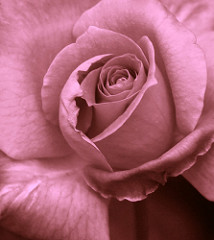

In [6]:
PIL.Image.open(str(roses[8]))

In [7]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [8]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [9]:
X = []
y = []

In [10]:
for flower_name , images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        reshaped = cv2.resize(img , (180,180))
        X.append(reshaped)
        y.append(flowers_labels_dict[flower_name])

In [11]:
X = np.array(X)
y = np.array(y)

In [12]:
X = X/255

In [13]:
from sklearn.model_selection import train_test_split
X_train , X_test ,  y_train , y_test = train_test_split(X , y  , random_state=10)

In [27]:
model = keras.Sequential([
    keras.layers.Conv2D(20 , (3,3) , padding="same" , activation="relu"  ),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(20 , (3,3) , padding="same" , activation="relu" ),
    keras.layers.MaxPool2D(),

    keras.layers.Flatten(),
    keras.layers.Dense(120 , activation="relu"),
    keras.layers.Dense(5) #  activation= linear
    ])

model.compile(optimizer="adam" , loss="sparse_categorical_crossentropy" , metrics=["accuracy"]  )

In [28]:
model.fit(X_train , y_train , epochs=30)

Epoch 1/30
86/86 [==============================] - 4s 25ms/step - loss: 6.2761 - accuracy: 0.2166
Epoch 2/30
86/86 [==============================] - 2s 18ms/step - loss: 6.1246 - accuracy: 0.2169
Epoch 3/30
86/86 [==============================] - 2s 17ms/step - loss: 4.7929 - accuracy: 0.2195
Epoch 4/30
86/86 [==============================] - 2s 17ms/step - loss: 4.0395 - accuracy: 0.2111
Epoch 5/30
86/86 [==============================] - 2s 18ms/step - loss: 4.0395 - accuracy: 0.2111
Epoch 6/30
86/86 [==============================] - 2s 18ms/step - loss: 4.0395 - accuracy: 0.2111
Epoch 7/30
86/86 [==============================] - 2s 18ms/step - loss: 4.0395 - accuracy: 0.2111
Epoch 8/30
86/86 [==============================] - 2s 18ms/step - loss: 4.0395 - accuracy: 0.2111
Epoch 9/30
86/86 [==============================] - 2s 20ms/step - loss: 4.0395 - accuracy: 0.2111
Epoch 10/30
86/86 [==============================] - 2s 18ms/step - loss: 4.0395 - accuracy: 0.2111
Epoch 11/

In [29]:
model.evaluate(X_test , y_test)

29/29 [==============================] - 0s 11ms/step - loss: 4.5467 - accuracy: 0.2200


[4.54670524597168, 0.22004356980323792]

In [30]:
y_predict = model.predict(X_test)

29/29 [==============================] - 0s 9ms/step


In [31]:
y_predict[0]

array([102.41829 , -32.541073,  51.675922,  42.92588 , 102.52283 ],
      dtype=float32)

In [32]:
tf.nn.softmax(y_predict[0])

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([4.738893e-01, 0.000000e+00, 4.350578e-23, 6.893695e-27,
       5.261107e-01], dtype=float32)>

In [33]:
np.argmax(tf.nn.softmax(y_predict[1]))

0

In [34]:
y_test[1]

4

In [45]:
arg = keras.Sequential([
    keras.layers.RandomRotation(0.9 ),
    keras.layers.Rescaling(0.5),


])

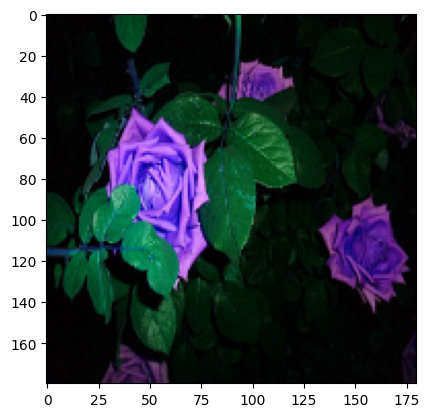

In [39]:
plt.imshow(X[0] )


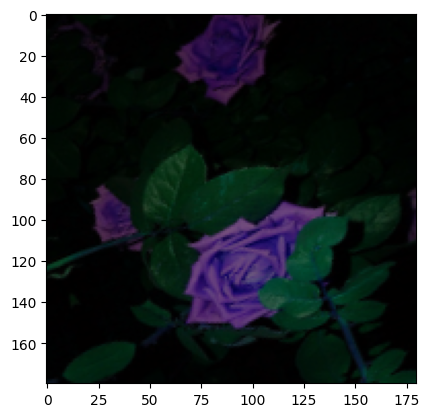

In [46]:
plt.imshow(arg(X)[0].numpy())

In [47]:
model2 = keras.Sequential([
    arg,
    keras.layers.Conv2D(20 , (3,3) , padding="same" , activation="relu"  ),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(20 , (3,3) , padding="same" , activation="relu" ),
    keras.layers.MaxPool2D(),

    keras.layers.Flatten(),
    keras.layers.Dense(120 , activation="relu"),
    keras.layers.Dense(5) #  activation= linear
    ])

model2.compile(optimizer="adam" , loss="sparse_categorical_crossentropy" , metrics=["accuracy"]  )

In [48]:
model2.fit(X_train , y_train , epochs=30)

Epoch 1/30
86/86 [==============================] - 5s 19ms/step - loss: 1.6843 - accuracy: 0.2413
Epoch 2/30
86/86 [==============================] - 2s 18ms/step - loss: 1.6094 - accuracy: 0.2456
Epoch 3/30
86/86 [==============================] - 2s 19ms/step - loss: 1.6094 - accuracy: 0.2453
Epoch 4/30
86/86 [==============================] - 2s 19ms/step - loss: 1.6094 - accuracy: 0.2478
Epoch 5/30
86/86 [==============================] - 2s 18ms/step - loss: 1.6094 - accuracy: 0.2460
Epoch 6/30
86/86 [==============================] - 2s 18ms/step - loss: 1.6094 - accuracy: 0.2460
Epoch 7/30
86/86 [==============================] - 2s 18ms/step - loss: 1.6094 - accuracy: 0.2449
Epoch 8/30
86/86 [==============================] - 2s 18ms/step - loss: 1.6094 - accuracy: 0.2464
Epoch 9/30
86/86 [==============================] - 2s 18ms/step - loss: 1.6094 - accuracy: 0.2449
Epoch 10/30
86/86 [==============================] - 2s 19ms/step - loss: 1.6094 - accuracy: 0.2471
Epoch 11/

In [49]:
model2.evaluate(X_test,y_test)

29/29 [==============================] - 1s 12ms/step - loss: 1.6094 - accuracy: 0.2342


[1.609437346458435, 0.23420479893684387]